# ALEXNET

In [ ]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import time

In [ ]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


In [ ]:
CLASS_NAMES= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
train_ds=tf.data.Dataset.from_tensor_slices((train_images,train_labels))
test_ds=tf.data.Dataset.from_tensor_slices((test_images,test_labels))

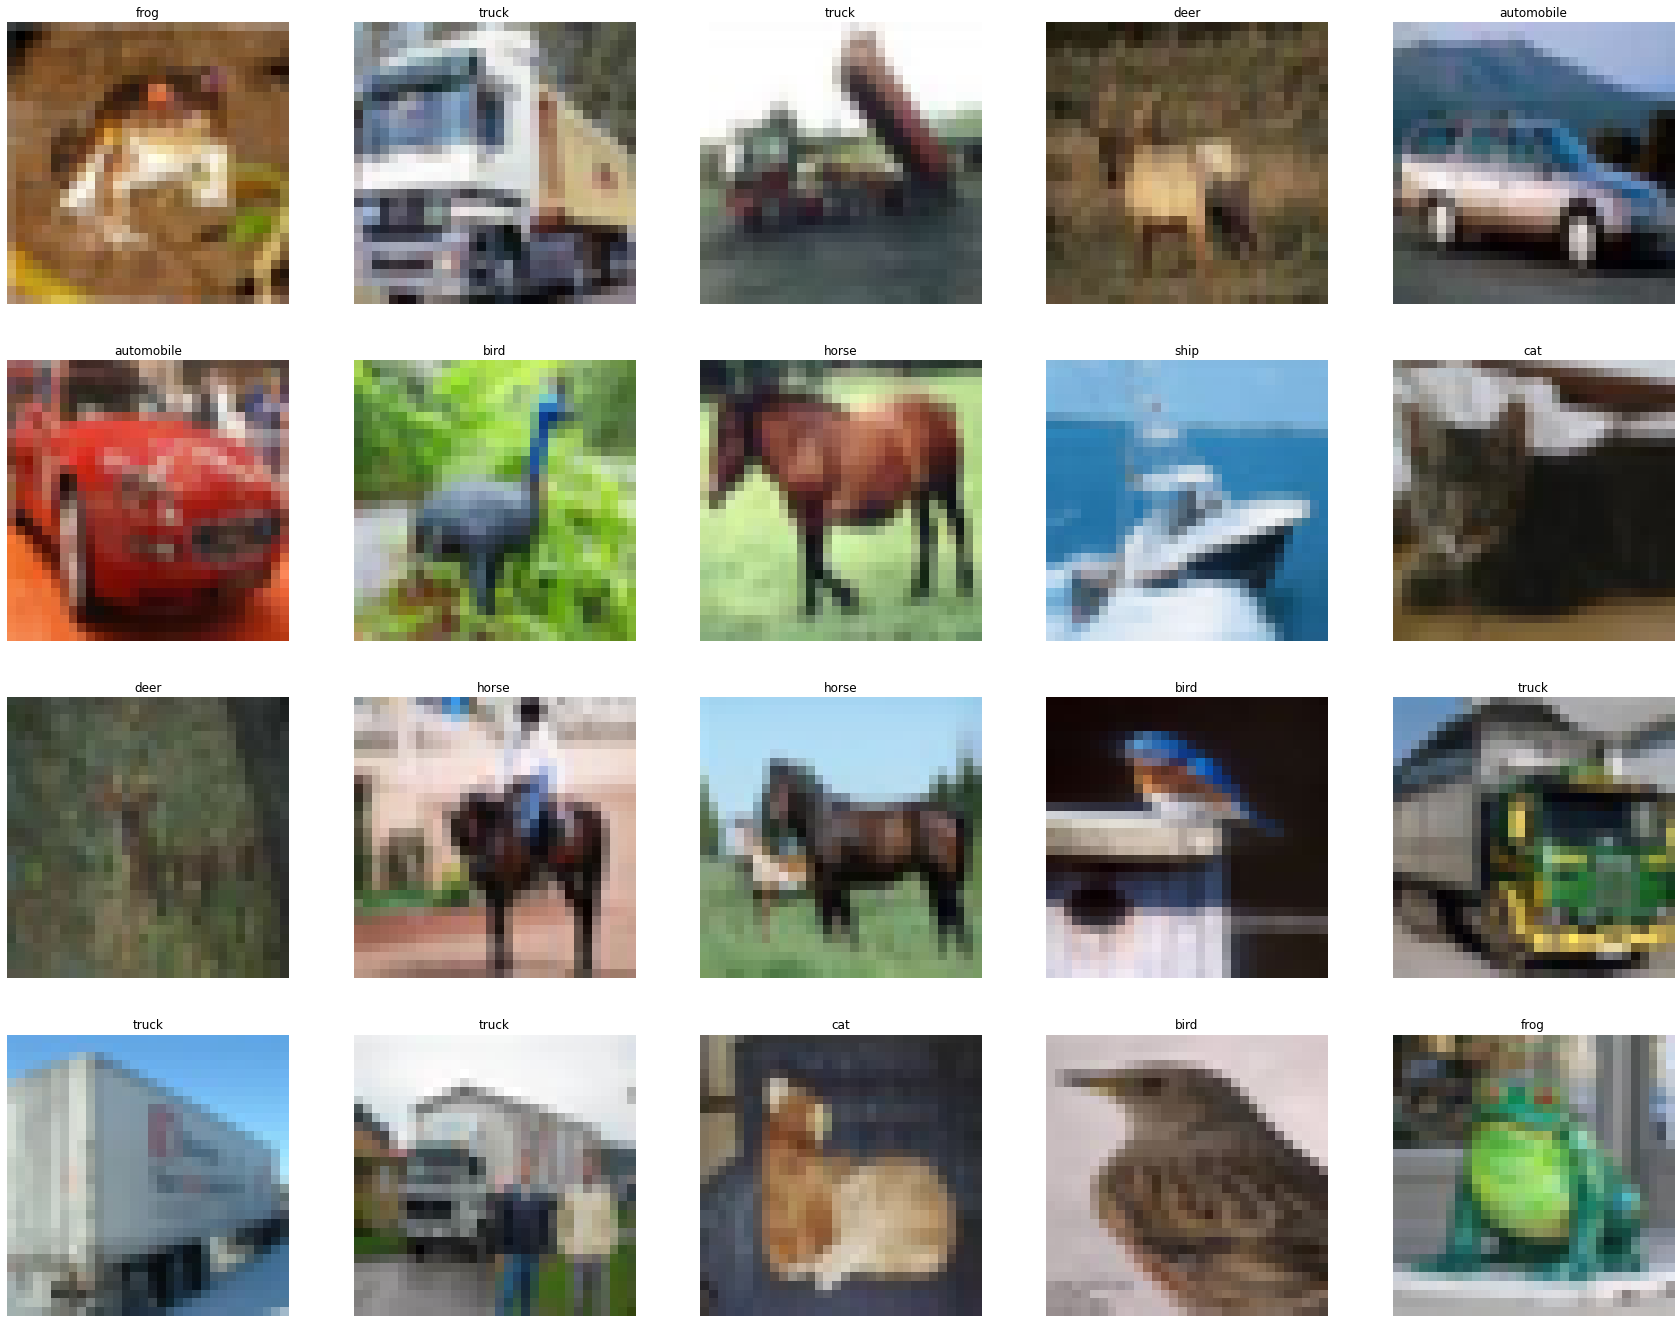

In [ ]:
plt.figure(figsize=(30,30))
for i,(image,label) in enumerate(train_ds.take(20)):
    ax=plt.subplot(5,5,i+1)
    plt.imshow(image)
    plt.title(CLASS_NAMES[label.numpy()[0]])
    plt.axis('off')

In [ ]:
def process_image(image,label):
    image=tf.image.per_image_standardization(image)
    image=tf.image.resize(image,(64,64))
    
    return image,label

In [ ]:
train_ds_size=tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size=tf.data.experimental.cardinality(test_ds).numpy()
print('Train size:',train_ds_size)
print('Test size:',test_ds_size)

Train size: 50000
Test size: 10000


In [ ]:
train_ds=(train_ds
          .map(process_image)
          .shuffle(buffer_size=train_ds_size)
          .batch(batch_size=32,drop_remainder=True)
         )
test_ds=(test_ds
          .map(process_image)
          .shuffle(buffer_size=test_ds_size)
          .batch(batch_size=32,drop_remainder=True)
         )

In [ ]:
from tensorflow import keras
import tensorflow as tf

In [ ]:
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(64,64,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation='softmax')  
    
    
])

In [ ]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.optimizers.SGD(lr=0.001),
    metrics=['accuracy']    
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 128)       46592     
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 128)      512       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 128)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 256)         819456    
                                                                 
 batch_normalization_1 (Batc  (None, 7, 7, 256)        1024      
 hNormalization)                                                 
                                                        

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history=model.fit(
    train_ds,
    epochs=70,
    validation_data=test_ds,
    validation_freq=1
)

Epoch 1/70
1562/1562 [==============================] - 40s 21ms/step - loss: 1.1268 - accuracy: 0.6056 - val_loss: 1.0408 - val_accuracy: 0.6353
Epoch 2/70
1562/1562 [==============================] - 39s 21ms/step - loss: 1.0331 - accuracy: 0.6379 - val_loss: 1.0331 - val_accuracy: 0.6378
Epoch 3/70
1562/1562 [==============================] - 39s 21ms/step - loss: 0.9597 - accuracy: 0.6656 - val_loss: 1.0225 - val_accuracy: 0.6482
Epoch 4/70
1562/1562 [==============================] - 39s 21ms/step - loss: 0.9040 - accuracy: 0.6860 - val_loss: 0.9565 - val_accuracy: 0.6683
Epoch 5/70
1562/1562 [==============================] - 38s 21ms/step - loss: 0.8395 - accuracy: 0.7083 - val_loss: 0.9310 - val_accuracy: 0.6781
Epoch 6/70
1562/1562 [==============================] - 39s 21ms/step - loss: 0.7907 - accuracy: 0.7243 - val_loss: 0.9142 - val_accuracy: 0.6828
Epoch 7/70
1562/1562 [==============================] - 38s 21ms/step - loss: 0.7408 - accuracy: 0.7432 - val_loss: 0.8987 -

In [ ]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

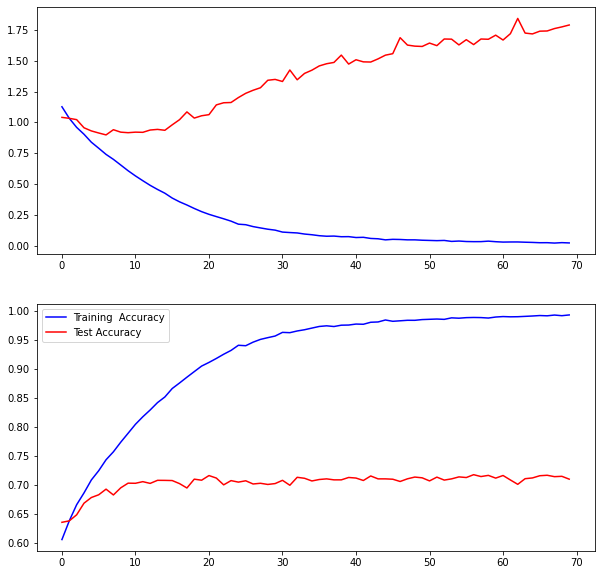

In [ ]:
f,ax=plt.subplots(2,1,figsize=(10,10)) 

#Assigning the first subplot to graph training loss and validation loss
ax[0].plot(model.history.history['loss'],color='b',label='Training Loss')
ax[0].plot(model.history.history['val_loss'],color='r',label='Test Loss')

#Plotting the training accuracy and validation accuracy
ax[1].plot(model.history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(model.history.history['val_accuracy'],color='r',label='Test Accuracy')

plt.legend()


In [ ]:
#loss, accuracy = model.evaluate(test_images, test_labels, batch_size=64)


# **RESNET**

---



In [ ]:
def preprocess_image_input(input_images):
  input_images = input_images.astype('float32')
  output_ims = tf.keras.applications.resnet50.preprocess_input(input_images)
  return output_ims

In [ ]:
train_X = preprocess_image_input(train_images)
valid_X = preprocess_image_input(test_images)

In [ ]:
def feature_extractor(inputs):

  feature_extractor = tf.keras.applications.resnet.ResNet50(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')(inputs)
  return feature_extractor


'''
Defines final dense layers and subsequent softmax layer for classification.
'''
def classifier(inputs):
    x = tf.keras.layers.GlobalAveragePooling2D()(inputs)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(1024, activation="relu")(x)
    x = tf.keras.layers.Dense(512, activation="relu")(x)
    x = tf.keras.layers.Dense(10, activation="softmax", name="classification")(x)
    return x
def final_model(inputs):

    resize = tf.keras.layers.UpSampling2D(size=(7,7))(inputs)

    resnet_feature_extractor = feature_extractor(resize)
    classification_output = classifier(resnet_feature_extractor)

    return classification_output

'''
Define the model and compile it. 
Use Stochastic Gradient Descent as the optimizer.
Use Sparse Categorical CrossEntropy as the loss function.
'''
def define_compile_model():
  inputs = tf.keras.layers.Input(shape=(32,32,3))
  
  classification_output = final_model(inputs) 
  model = tf.keras.Model(inputs=inputs, outputs = classification_output)
 
  model.compile(optimizer='SGD', 
                loss='sparse_categorical_crossentropy',
                metrics = ['accuracy'])
  
  return model


model = define_compile_model()


94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              209817

In [ ]:
history = model.fit(train_X, train_labels, epochs=3, validation_data = (valid_X, test_labels), batch_size=64)

Epoch 1/3
782/782 [==============================] - 1116s 1s/step - loss: 0.4025 - accuracy: 0.8693 - val_loss: 0.2328 - val_accuracy: 0.9202
Epoch 2/3
782/782 [==============================] - 1069s 1s/step - loss: 0.1019 - accuracy: 0.9663 - val_loss: 0.1586 - val_accuracy: 0.9461
Epoch 3/3
782/782 [==============================] - 1069s 1s/step - loss: 0.0351 - accuracy: 0.9896 - val_loss: 0.1704 - val_accuracy: 0.9481


In [ ]:
loss, accuracy = model.evaluate(valid_X, test_labels, batch_size=64)


157/157 [==============================] - 58s 372ms/step - loss: 0.1704 - accuracy: 0.9481


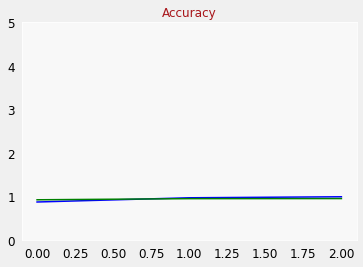

In [ ]:
from matplotlib import pyplot as plt
#Matplotlib config
plt.rc('image', cmap='gray')
plt.rc('grid', linewidth=0)
plt.rc('xtick', top=False, bottom=False, labelsize='large')
plt.rc('ytick', left=False, right=False, labelsize='large')
plt.rc('axes', facecolor='F8F8F8', titlesize="large", edgecolor='white')
plt.rc('text', color='a8151a')
plt.rc('figure', facecolor='F0F0F0')# Matplotlib fonts
MATPLOTLIB_FONT_DIR = os.path.join(os.path.dirname(plt.__file__), "mpl-data/fonts/ttf")

# utility to display a row of digits with their predictions
def display_images(digits, predictions, labels, title):

  n = 10

  indexes = np.random.choice(len(predictions), size=n)
  n_digits = digits[indexes]
  n_predictions = predictions[indexes]
  n_predictions = n_predictions.reshape((n,))
  n_labels = labels[indexes]
 
  fig = plt.figure(figsize=(20, 4))
  plt.title(title)
  plt.yticks([])
  plt.xticks([])

  for i in range(10):
    ax = fig.add_subplot(1, 10, i+1)
    class_index = n_predictions[i]
    
    plt.xlabel(classes[class_index])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(n_digits[i])

# utility to display training and validation curves
def plot_metrics(metric_name, title, ylim=5):
  plt.title(title)
  plt.ylim(0,ylim)
  plt.plot(history.history[metric_name],color='blue',label=metric_name)
  plt.plot(history.history['val_' + metric_name],color='green',label='val_' + metric_name)

plot_metrics("accuracy", "Accuracy")

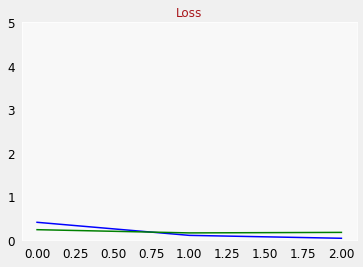

In [ ]:
plot_metrics("loss", "Loss")

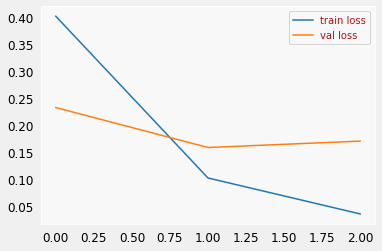

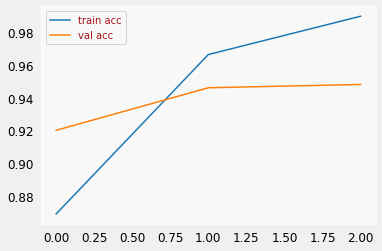

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')



#**VGG16**

In [ ]:
import keras
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, Convolution2D
from keras import backend as K
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import optimizers
import numpy as np
from keras.layers.core import Lambda
from keras import backend as K
from keras import regularizers

In [ ]:
from keras.utils import to_categorical

In [ ]:
x_train = train_images.astype('float32')
x_test =test_images.astype('float32')

y_train = keras.utils.to_categorical(train_labels, 10)
y_test = keras.utils.to_categorical(test_labels, 10)

In [ ]:
pip install keras-utils

  Created wheel for keras-utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2656 sha256=92106e6267b4941c38867a39a947d41b539ba0877ea2a11359b395d459e745c6
  Stored in directory: /root/.cache/pip/wheels/d0/dd/3b/493952a5240d486a83805d65360dedadbadeae71d25e2c877f
Successfully built keras-utils


In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
x_train = train_images.astype('float32')
x_test =test_images.astype('float32')

y_train = tf.keras.utils.to_categorical(train_labels, 10)
y_test = tf.keras.utils.to_categorical(test_labels, 10)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, X_val, y_train, y_val  = train_test_split(x_train, y_train, test_size=0.25, random_state=1)

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
IMAGE_SIZE = [32,32]

In [ ]:
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
for layer in vgg16.layers:
    layer.trainable = False

In [ ]:
x = Flatten()(vgg16.output)

In [ ]:
prediction = Dense(10, activation='softmax')(x)

model = Model(inputs=vgg16.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0   

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
r = model.fit(x_train,y_train,
              validation_data=(X_val, y_val),
  epochs=20,
  steps_per_epoch=50,validation_steps=5
  
  
)

Epoch 1/20
50/50 [==============================] - 34s 557ms/step - loss: 10.2409 - accuracy: 0.3435 - val_loss: 7.3798 - val_accuracy: 0.4096
Epoch 2/20
50/50 [==============================] - 10s 211ms/step - loss: 6.1898 - accuracy: 0.4369 - val_loss: 5.1711 - val_accuracy: 0.4598
Epoch 3/20
50/50 [==============================] - 10s 211ms/step - loss: 4.4296 - accuracy: 0.4800 - val_loss: 3.9488 - val_accuracy: 0.4877
Epoch 4/20
50/50 [==============================] - 11s 212ms/step - loss: 3.3769 - accuracy: 0.5078 - val_loss: 3.1659 - val_accuracy: 0.5108
Epoch 5/20
50/50 [==============================] - 10s 210ms/step - loss: 2.6807 - accuracy: 0.5302 - val_loss: 2.6102 - val_accuracy: 0.5175
Epoch 6/20
50/50 [==============================] - 11s 212ms/step - loss: 2.1869 - accuracy: 0.5459 - val_loss: 2.1822 - val_accuracy: 0.5367
Epoch 7/20
50/50 [==============================] - 10s 210ms/step - loss: 1.8206 - accuracy: 0.5617 - val_loss: 1.8574 - val_accuracy: 0.546

In [ ]:
import matplotlib.pyplot as plt

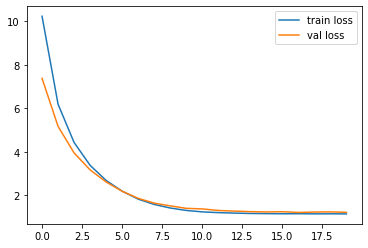

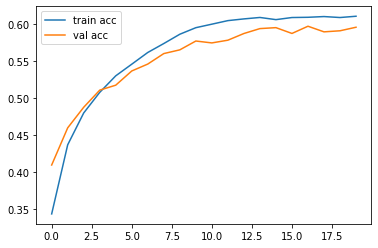

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

Inception_ResNetV2

# Inception_ResNetV2




In [ ]:
import numpy as np

from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical

import tensorflow as tf
import matplotlib.pyplot as plt
import scipy.misc
from tensorflow.data.experimental import cardinality
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input, decode_predictions
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, GlobalAveragePooling2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import random_uniform, glorot_uniform, constant, identity
from tensorflow.python.framework.ops import EagerTensor
from matplotlib.pyplot import imshow

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
X_train= preprocess_input(X_train)
X_test= preprocess_input(X_test)

y_train= to_categorical(y_train,10)
y_test= to_categorical(y_test,10)

In [ ]:
inputs= tf.keras.Input(shape=(32,32,3))

input_resize = tf.keras.layers.Lambda(lambda images: tf.keras.backend.resize_images(images, (int(220 / 32)), (int(220 / 32)),"channels_last"))(inputs)

inputs_pad= ZeroPadding2D(padding=4)(input_resize)

base_model = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=inputs_pad)
base_model.trainable= False

x = base_model.output
x = Flatten()(x)
x = BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
x = BatchNormalization()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = BatchNormalization()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(10, activation='softmax')(x)




model =Model(inputs=inputs, outputs=outputs, name="model")

219070464/219055592 [==============================] - 3s 0us/step


In [ ]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.96,
    staircase=True)
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), metrics=['accuracy'])
history= model.fit(X_train, y_train, epochs = 10, batch_size = 128, validation_split=0.2, verbose=1)


Epoch 1/10
313/313 [==============================] - 441s 1s/step - loss: 0.4494 - accuracy: 0.8603 - val_loss: 0.3057 - val_accuracy: 0.9020
Epoch 2/10
313/313 [==============================] - 391s 1s/step - loss: 0.2783 - accuracy: 0.9100 - val_loss: 0.2923 - val_accuracy: 0.9086
Epoch 3/10
313/313 [==============================] - 390s 1s/step - loss: 0.2124 - accuracy: 0.9311 - val_loss: 0.3013 - val_accuracy: 0.9065
Epoch 4/10
313/313 [==============================] - 391s 1s/step - loss: 0.1616 - accuracy: 0.9471 - val_loss: 0.3009 - val_accuracy: 0.9095
Epoch 5/10
313/313 [==============================] - 395s 1s/step - loss: 0.1306 - accuracy: 0.9565 - val_loss: 0.3236 - val_accuracy: 0.9057
Epoch 6/10
313/313 [==============================] - 397s 1s/step - loss: 0.1064 - accuracy: 0.9643 - val_loss: 0.3402 - val_accuracy: 0.9064
Epoch 7/10
313/313 [==============================] - 392s 1s/step - loss: 0.0876 - accuracy: 0.9715 - val_loss: 0.3705 - val_accuracy: 0.9053

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size=64)

157/157 [==============================] - 81s 516ms/step - loss: 0.3632 - accuracy: 0.9140


# InceptionV3

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
X_train= preprocess_input(X_train)
X_test= preprocess_input(X_test)

y_train= to_categorical(y_train,10)
y_test= to_categorical(y_test,10)




In [ ]:
inputs= tf.keras.Input(shape=(32,32,3))

input_resize = tf.keras.layers.Lambda(lambda images: tf.keras.backend.resize_images(images, (int(175 / 32)), (int(175 / 32)),"channels_last"))(inputs)

inputs_pad= ZeroPadding2D(padding=4)(input_resize)

base_model = InceptionV3(include_top=False, weights='imagenet', input_tensor=inputs_pad)
base_model.trainable= False

x = base_model.output
x = Flatten()(x)
x = BatchNormalization()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.4)(x)
x = BatchNormalization()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.4)(x)
x = BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)
outputs = Dense(10, activation='softmax')(x)

model =Model(inputs=inputs, outputs=outputs, name="model")

In [ ]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.96,
    staircase=True)
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), metrics=['accuracy'])
history= model.fit(X_train,y_train, epochs = 10, batch_size = 128, verbose=1, validation_split=0.2 )


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size=64)

# Xception

In [ ]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input, decode_predictions

(X_train, y_train), (X_test, y_test)= cifar10.load_data()

In [ ]:
X_train= preprocess_input(X_train)
X_test= preprocess_input(X_test)

y_train= to_categorical(y_train,10)
y_test= to_categorical(y_test,10)

In [ ]:
inputs= tf.keras.Input(shape=(32,32,3))

input_resize = tf.keras.layers.Lambda(lambda images: tf.keras.backend.resize_images(images, (int(295 / 32)), (int(295 / 32)),"channels_last"))(inputs)

inputs_pad= ZeroPadding2D(padding=4)(input_resize)

base_model = Xception(include_top=False, weights='imagenet', input_tensor=inputs_pad)
base_model.trainable= False

x = base_model.output
x = Flatten()(x)
x = BatchNormalization()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = BatchNormalization()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(10, activation='softmax')(x)


In [ ]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.96,
    staircase=True)
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), metrics=['accuracy'])
history= model.fit(X_train,y_train, epochs = 5, batch_size = 128, verbose=1, validation_split=0.2 )

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size=64)

In [ ]:
#New architecture


# **MLP-MIXER**

In [ ]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("mixed_float16")

Your GPU may run slowly with dtype policy mixed_float16 because it does not have compute capability of at least 7.0. Your GPU:
  Tesla K80, compute capability 3.7
See https://developer.nvidia.com/cuda-gpus for a list of GPUs and their compute capabilities.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once


In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [ ]:
try: 
    tpu = None
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver() 
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)
except ValueError: 
    strategy = tf.distribute.MirroredStrategy() 

print("Number of accelerators: ", strategy.num_replicas_in_sync)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
Number of accelerators:  1


In [ ]:
RESIZE_TO = 72
PATCH_SIZE = 9

NUM_MIXER_LAYERS = 4
HIDDEN_SIZE = 128
MLP_SEQ_DIM = 64
MLP_CHANNEL_DIM = 128

EPOCHS = 10 #100
BATCH_SIZE = 512 * strategy.num_replicas_in_sync

In [ ]:
def get_augmentation_layers():
    data_augmentation = keras.Sequential(
        [
            layers.experimental.preprocessing.Normalization(),
            layers.experimental.preprocessing.Resizing(RESIZE_TO, RESIZE_TO),
            layers.experimental.preprocessing.RandomFlip("horizontal"),
            layers.experimental.preprocessing.RandomRotation(factor=0.02),
            layers.experimental.preprocessing.RandomZoom(
                height_factor=0.2, width_factor=0.2
            ),
        ],
        name="data_augmentation",
    )
    # Compute the mean and the variance of the training data for normalization.
    data_augmentation.layers[0].adapt(x_train)
    
    return data_augmentation

In [ ]:
def mlp_block(x, mlp_dim):
    x = layers.Dense(mlp_dim)(x)
    x = tf.nn.gelu(x)
    return layers.Dense(x.shape[-1])(x)

def mixer_block(x, tokens_mlp_dim, channels_mlp_dim):
    y = layers.LayerNormalization()(x)
    y = layers.Permute((2, 1))(y)
    
    token_mixing = mlp_block(y, tokens_mlp_dim)
    token_mixing = layers.Permute((2, 1))(token_mixing)
    x = layers.Add()([x, token_mixing])
    
    y = layers.LayerNormalization()(x)
    channel_mixing = mlp_block(y, channels_mlp_dim)
    output = layers.Add()([x, channel_mixing])
    return output

def mlp_mixer(x, num_blocks, patch_size, hidden_dim, 
              tokens_mlp_dim, channels_mlp_dim,
              num_classes=10):
    x = layers.Conv2D(hidden_dim, kernel_size=patch_size,
                      strides=patch_size, padding="valid")(x)
    x = layers.Reshape((x.shape[1]*x.shape[2], x.shape[3]))(x)

    for _ in range(num_blocks):
        x = mixer_block(x, tokens_mlp_dim, channels_mlp_dim)
    
    x = layers.LayerNormalization()(x)
    x = layers.Dropout(0.25)(x)
    x = layers.GlobalAveragePooling1D()(x)
    return layers.Dense(num_classes, activation="softmax", dtype="float32")(x)

In [ ]:
def create_mlp_mixer():
    data_augmentation = get_augmentation_layers()
    
    inputs = layers.Input(shape=(32, 32, 3))
    augmented = data_augmentation(inputs)
    outputs = mlp_mixer(augmented, NUM_MIXER_LAYERS,
                        PATCH_SIZE, HIDDEN_SIZE, 
                        MLP_SEQ_DIM, MLP_CHANNEL_DIM)
    return tf.keras.Model(inputs, outputs, name="mlp_mixer")

In [ ]:

from tensorflow.keras import layers

In [ ]:
# We need to instantiate the model here for the callback below.
with strategy.scope():
    mlp_mixer_classifier = create_mlp_mixer()

In [ ]:

def get_augmentation_layers():
    data_augmentation = keras.Sequential(
        [
            layers.experimental.preprocessing.Normalization(),
            layers.experimental.preprocessing.Resizing(RESIZE_TO, RESIZE_TO),
            layers.experimental.preprocessing.RandomFlip("horizontal"),
            layers.experimental.preprocessing.RandomRotation(factor=0.02),
            layers.experimental.preprocessing.RandomZoom(
                height_factor=0.2, width_factor=0.2
            ),
        ],
        name="data_augmentation",
    )
    # Compute the mean and the variance of the training data for normalization.
    data_augmentation.layers[0].adapt(x_train)
    
    return data_augmentation

In [ ]:
def mlp_block(x, mlp_dim):
    x = layers.Dense(mlp_dim)(x)
    x = tf.nn.gelu(x)
    return layers.Dense(x.shape[-1])(x)

def mixer_block(x, tokens_mlp_dim, channels_mlp_dim):
    y = layers.LayerNormalization()(x)
    y = layers.Permute((2, 1))(y)
    
    token_mixing = mlp_block(y, tokens_mlp_dim)
    token_mixing = layers.Permute((2, 1))(token_mixing)
    x = layers.Add()([x, token_mixing])
    
    y = layers.LayerNormalization()(x)
    channel_mixing = mlp_block(y, channels_mlp_dim)
    output = layers.Add()([x, channel_mixing])
    return output

def mlp_mixer(x, num_blocks, patch_size, hidden_dim, 
              tokens_mlp_dim, channels_mlp_dim,
              num_classes=10):
    x = layers.Conv2D(hidden_dim, kernel_size=patch_size,
                      strides=patch_size, padding="valid")(x)
    x = layers.Reshape((x.shape[1]*x.shape[2], x.shape[3]))(x)

    for _ in range(num_blocks):
        x = mixer_block(x, tokens_mlp_dim, channels_mlp_dim)
    
    x = layers.LayerNormalization()(x)
    x = layers.Dropout(0.25)(x)
    x = layers.GlobalAveragePooling1D()(x)
    return layers.Dense(num_classes, activation="softmax", dtype="float32")(x)

In [ ]:
def create_mlp_mixer():
    data_augmentation = get_augmentation_layers()
    
    inputs = layers.Input(shape=(32, 32, 3))
    augmented = data_augmentation(inputs)
    outputs = mlp_mixer(augmented, NUM_MIXER_LAYERS,
                        PATCH_SIZE, HIDDEN_SIZE, 
                        MLP_SEQ_DIM, MLP_CHANNEL_DIM)
    return tf.keras.Model(inputs, outputs, name="mlp_mixer")

In [ ]:
# We need to instantiate the model here for the callback below.
with strategy.scope():
    mlp_mixer_classifier = create_mlp_mixer()

In [ ]:
# Courtesy: https://www.tensorflow.org/tensorboard/image_summaries
file_writer_cm = tf.summary.create_file_writer("logs/mixer_projection")

def plot_to_image(figure):
    # Save the plot to a PNG in memory.
    buf = io.BytesIO()
    plt.savefig(buf, format="png")
    
    # Closing the figure prevents it from being displayed directly inside
    # the notebook.
    plt.close(figure)
    buf.seek(0)
    
    # Convert PNG buffer to TF image
    image = tf.image.decode_png(buf.getvalue(), channels=4)
    
    # Add the batch dimension
    image = tf.expand_dims(image, 0)
    return image

def log_progression(epoch, logs):
    projections = mlp_mixer_classifier.layers[2].get_weights()[0]
    p_min, p_max = projections.min(), projections.max()
    projections = (projections - p_min) / (p_max - p_min)

    figure = plt.figure(figsize=(10, 10))
    n_filters, ix = 128, 1
    for i in range(n_filters):
        projection = projections[:, :, :, i]
        plt.subplot(8, 16, ix)
        plt.axis("off")
        plt.imshow(projection)
        ix += 1

    progress_image = plot_to_image(figure)
    with file_writer_cm.as_default():
        tf.summary.image("Progression", progress_image, step=epoch)

In [ ]:
def run_experiment(model):
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001 * strategy.num_replicas_in_sync)

    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    checkpoint_filepath = "/tmp/checkpoint"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )
    
    progress_callback = tf.keras.callbacks.LambdaCallback(on_epoch_end=log_progression)

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=BATCH_SIZE,
        epochs=EPOCHS,
        validation_split=0.1,
        callbacks=[checkpoint_callback, progress_callback],
    )

    model.load_weights(checkpoint_filepath)
    _, top_1_accuracy = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {round(top_1_accuracy * 100, 2)}%")
    
    return history, model

In [ ]:


import io

In [ ]:
with strategy.scope():
    history, model = run_experiment(mlp_mixer_classifier)
  

Epoch 1/10
88/88 [==============================] - 49s 418ms/step - loss: 1.0316 - accuracy: 0.6348 - val_loss: 1.0191 - val_accuracy: 0.6370
Epoch 2/10
88/88 [==============================] - 32s 362ms/step - loss: 0.9950 - accuracy: 0.6467 - val_loss: 1.0099 - val_accuracy: 0.6430
Epoch 3/10
88/88 [==============================] - 32s 363ms/step - loss: 0.9819 - accuracy: 0.6516 - val_loss: 0.9873 - val_accuracy: 0.6502
Epoch 4/10
88/88 [==============================] - 31s 355ms/step - loss: 0.9543 - accuracy: 0.6614 - val_loss: 0.9769 - val_accuracy: 0.6534
Epoch 5/10
88/88 [==============================] - 32s 362ms/step - loss: 0.9376 - accuracy: 0.6661 - val_loss: 0.9647 - val_accuracy: 0.6540
Epoch 6/10
88/88 [==============================] - 31s 353ms/step - loss: 0.9201 - accuracy: 0.6741 - val_loss: 0.9603 - val_accuracy: 0.6580
Epoch 7/10
88/88 [==============================] - 32s 363ms/step - loss: 0.8957 - accuracy: 0.6822 - val_loss: 0.9319 - val_accuracy: 0.6686

In [ ]:
print("Test accuracy: 67.34%")

Test accuracy: 67.34%


# **EfficientNet**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils.multiclass import unique_labels
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow import keras

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
#Train-validation-test split
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.3)

#Dimension of the CIFAR10 dataset
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 1))
((15000, 32, 32, 3), (15000, 1))
((10000, 32, 32, 3), (10000, 1))


In [ ]:
#Onehot Encoding the labels.
from sklearn.utils.multiclass import unique_labels
from tensorflow.keras.utils import to_categorical

#Since we have 10 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 10
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

#Verifying the dimension after one hot encoding
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))






#Image Data Augmentation
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1 )

val_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1)

test_generator = ImageDataGenerator(rotation_range=2, horizontal_flip= True,zoom_range=.1)

#Fitting the augmentation defined above to the data
train_generator.fit(x_train)
val_generator.fit(x_val)
test_generator.fit(x_test)

((35000, 32, 32, 3), (35000, 10))
((15000, 32, 32, 3), (15000, 10))
((10000, 32, 32, 3), (10000, 10))


In [ ]:

#Learning Rate Annealer
from keras.callbacks import ReduceLROnPlateau
lrr= ReduceLROnPlateau(   monitor='val_acc',   factor=.01,   patience=3,  min_lr=1e-5)


In [ ]:
!pip install keras_efficientnets

In [ ]:
from tensorflow.keras.applications import EfficientNetB5

In [ ]:
#Defining the model
base_model = EfficientNetB5(include_top=False, weights="imagenet", input_shape=(32,32,3),classes=y_train.shape[1])

#Adding the final layers to the above base models where the actual classification is done in the dense layers

model= Sequential()
model.add(base_model) 
model.add(Flatten()) 

#Model summary
model.summary()


115277824/115263384 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb5 (Functional)  (None, 1, 1, 2048)       28513527  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
Total params: 28,513,527
Trainable params: 28,340,784
Non-trainable params: 172,743
_________________________________________________________________


In [ ]:
#Adding the Dense layers along with activation and batch normalization
model.add(Dense(1024,activation=('relu'),input_dim=512))

model.add(Dense(512,activation=('relu'))) 
model.add(Dense(256,activation=('relu'))) 
#model.add(Dropout(.3))
model.add(Dense(128,activation=('relu')))
#model.add(Dropout(.2))
model.add(Dense(10,activation=('softmax'))) 

#Checking the final model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb5 (Functional)  (None, 1, 1, 2048)       28513527  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 10)                1

In [ ]:
#Defining the parameters
batch_size= 10
epochs= 10
learn_rate=.001

In [ ]:
sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

#Training the model
model.fit_generator(train_generator.flow(x_train, y_train, batch_size = batch_size), epochs = epochs, steps_per_epoch = x_train.shape[0]//batch_size, validation_data = val_generator.flow(x_val, y_val, batch_size = batch_size), validation_steps = 250,  callbacks = [lrr], verbose = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/5
3500/3500 [==============================] - 2997s 850ms/step - loss: 1.5543 - accuracy: 0.4427 - val_loss: 1.2896 - val_accuracy: 0.5588 - lr: 0.0010
Epoch 2/5
3500/3500 [==============================] - 3003s 858ms/step - loss: 1.2229 - accuracy: 0.5778 - val_loss: 0.9792 - val_accuracy: 0.6808 - lr: 0.0010
Epoch 3/5
3500/3500 [==============================] - ETA: 0s - loss: 1.0486 - accuracy: 0.6418

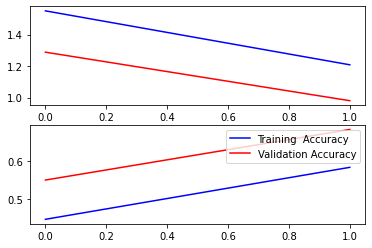

In [ ]:
import matplotlib.pyplot as plt
#Plotting the training and validation loss

f,ax=plt.subplots(2,1) #Creates 2 subplots under 1 column

#Assigning the first subplot to graph training loss and validation loss
ax[0].plot(model.history.history['loss'],color='b',label='Training Loss')
ax[0].plot(model.history.history['val_loss'],color='r',label='Validation Loss')

#Plotting the training accuracy and validation accuracy
ax[1].plot(model.history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(model.history.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()

# **EfficientNetv2**

In [ ]:
import itertools
import os

import matplotlib.pylab as plt
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub

print('TF version:', tf.__version__)
print('Hub version:', hub.__version__)
print('Phsical devices:', tf.config.list_physical_devices())

def get_hub_url_and_isize(model_name, ckpt_type, hub_type):
  if ckpt_type == '1k':
    ckpt_type = ''  # json doesn't support empty string
  else:
    ckpt_type = '-' + ckpt_type  # add '-' as prefix
  
  hub_url_map = {
    'efficientnetv2-b0': f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-b0/{hub_type}',
    'efficientnetv2-b1': f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-b1/{hub_type}',
    'efficientnetv2-b2': f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-b2/{hub_type}',
    'efficientnetv2-b3': f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-b3/{hub_type}',
    'efficientnetv2-s':  f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-s/{hub_type}',
    'efficientnetv2-m':  f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-m/{hub_type}',
    'efficientnetv2-l':  f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-l/{hub_type}',

    'efficientnetv2-b0-21k': f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-b0-21k/{hub_type}',
    'efficientnetv2-b1-21k': f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-b1-21k/{hub_type}',
    'efficientnetv2-b2-21k': f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-b2-21k/{hub_type}',
    'efficientnetv2-b3-21k': f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-b3-21k/{hub_type}',
    'efficientnetv2-s-21k':  f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-s-21k/{hub_type}',
    'efficientnetv2-m-21k':  f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-m-21k/{hub_type}',
    'efficientnetv2-l-21k':  f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-l-21k/{hub_type}',
    'efficientnetv2-xl-21k':  f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-xl-21k/{hub_type}',

    'efficientnetv2-b0-21k-ft1k': f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-b0-21k-ft1k/{hub_type}',
    'efficientnetv2-b1-21k-ft1k': f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-b1-21k-ft1k/{hub_type}',
    'efficientnetv2-b2-21k-ft1k': f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-b2-21k-ft1k/{hub_type}',
    'efficientnetv2-b3-21k-ft1k': f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-b3-21k-ft1k/{hub_type}',
    'efficientnetv2-s-21k-ft1k':  f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-s-21k-ft1k/{hub_type}',
    'efficientnetv2-m-21k-ft1k':  f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-m-21k-ft1k/{hub_type}',
    'efficientnetv2-l-21k-ft1k':  f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-l-21k-ft1k/{hub_type}',
    'efficientnetv2-xl-21k-ft1k':  f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-xl-21k-ft1k/{hub_type}',
      
    # efficientnetv1
    'efficientnet_b0': f'https://tfhub.dev/tensorflow/efficientnet/b0/{hub_type}/1',
    'efficientnet_b1': f'https://tfhub.dev/tensorflow/efficientnet/b1/{hub_type}/1',
    'efficientnet_b2': f'https://tfhub.dev/tensorflow/efficientnet/b2/{hub_type}/1',
    'efficientnet_b3': f'https://tfhub.dev/tensorflow/efficientnet/b3/{hub_type}/1',
    'efficientnet_b4': f'https://tfhub.dev/tensorflow/efficientnet/b4/{hub_type}/1',
    'efficientnet_b5': f'https://tfhub.dev/tensorflow/efficientnet/b5/{hub_type}/1',
    'efficientnet_b6': f'https://tfhub.dev/tensorflow/efficientnet/b6/{hub_type}/1',
    'efficientnet_b7': f'https://tfhub.dev/tensorflow/efficientnet/b7/{hub_type}/1',
  }
  
  image_size_map = {
    'efficientnetv2-b0': 224,
    'efficientnetv2-b1': 240,
    'efficientnetv2-b2': 260,
    'efficientnetv2-b3': 300,
    'efficientnetv2-s':  384,
    'efficientnetv2-m':  480,
    'efficientnetv2-l':  480,
    'efficientnetv2-xl':  512,
  
    'efficientnet_b0': 224,
    'efficientnet_b1': 240,
    'efficientnet_b2': 260,
    'efficientnet_b3': 300,
    'efficientnet_b4': 380,
    'efficientnet_b5': 456,
    'efficientnet_b6': 528,
    'efficientnet_b7': 600,
  }
  
  hub_url = hub_url_map.get(model_name + ckpt_type)
  image_size = image_size_map.get(model_name, 224)
  return hub_url, image_size


def get_imagenet_labels(filename):
  labels = []
  with open(filename, 'r') as f:
    for line in f:
      labels.append(line.split('\t')[1][:-1])  # split and remove line break.
  return labels


TF version: 2.7.0
Hub version: 0.12.0
Phsical devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


40960/31677 [======================================] - 0s 0us/step
top 1 (90.4%):  giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca 
top 2 (0.2%):  lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens 
top 3 (0.1%):  indri, indris, Indri indri, Indri brevicaudatus 
top 4 (0.1%):  soccer ball 
top 5 (0.1%):  earthstar 


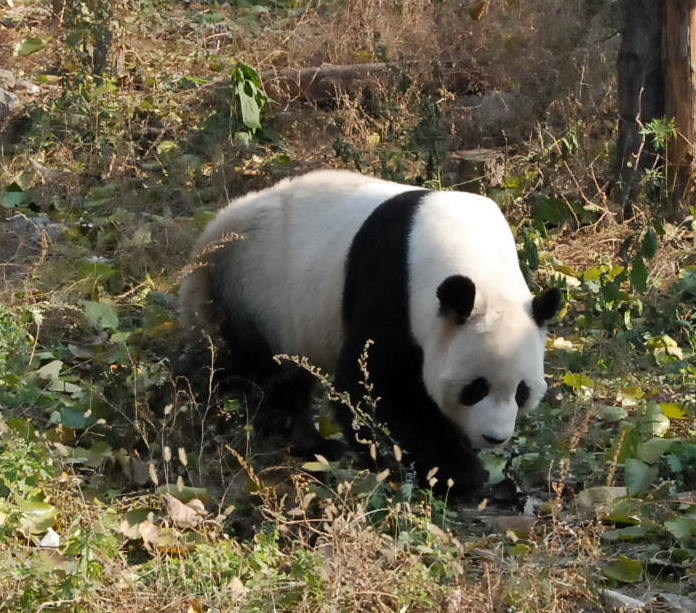

In [ ]:
import tensorflow_hub as hub
model_name = 'efficientnetv2-s' #@param {type:'string'}
ckpt_type = '1k'   # @param ['21k-ft1k', '1k']
hub_type = 'classification' # @param ['classification', 'feature-vector']
hub_url, image_size = get_hub_url_and_isize(model_name, ckpt_type, hub_type)
tf.keras.backend.clear_session()
m = hub.KerasLayer(hub_url, trainable=False)
m.build([None, 224, 224, 3])  # Batch input shape.

# Download label map file and image
labels_map = '/tmp/imagenet1k_labels.txt'
image_file = '/tmp/panda.jpg'
tf.keras.utils.get_file(image_file, 'https://upload.wikimedia.org/wikipedia/commons/f/fe/Giant_Panda_in_Beijing_Zoo_1.JPG')
tf.keras.utils.get_file(labels_map, 'https://storage.googleapis.com/cloud-tpu-checkpoints/efficientnet/v2/imagenet1k_labels.txt')

# preprocess image.
image = tf.keras.preprocessing.image.load_img(image_file, target_size=(224, 224))
image = tf.keras.preprocessing.image.img_to_array(image)
image = (image - 128.) / 128.
logits = m(tf.expand_dims(image, 0), False)

# Output classes and probability
pred = tf.keras.layers.Softmax()(logits)
idx = tf.argsort(logits[0])[::-1][:5].numpy()
classes = get_imagenet_labels(labels_map)
for i, id in enumerate(idx):
  print(f'top {i+1} ({pred[0][id]*100:.1f}%):  {classes[id]} ')
from IPython import display
display.display(display.Image(image_file))


In [ ]:
import tensorflow_hub as hub
model_name = 'efficientnetv2-b0' #@param {type:'string'}
ckpt_type = '1k'   # @param ['21k', '21k-ft1k', '1k']
hub_type = 'feature-vector' # @param ['feature-vector']
batch_size =  32#@param {type:"integer"}
hub_url, image_size = get_hub_url_and_isize(model_name, ckpt_type, hub_type)

In [ ]:
data_dir = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True)
    
datagen_kwargs = dict(rescale=1./255, validation_split=.20)
dataflow_kwargs = dict(target_size=(image_size, image_size),
                       batch_size=batch_size,
                       interpolation="bilinear")

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    **datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(
    data_dir, subset="validation", shuffle=False, **dataflow_kwargs)

do_data_augmentation = False #@param {type:"boolean"}
if do_data_augmentation:
  train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rotation_range=40,
      horizontal_flip=True,
      width_shift_range=0.2, height_shift_range=0.2,
      shear_range=0.2, zoom_range=0.2,
      **datagen_kwargs)
else:
  train_datagen = valid_datagen
train_generator = train_datagen.flow_from_directory(
    data_dir, subset="training", shuffle=True, **dataflow_kwargs)


228827136/228813984 [==============================] - 3s 0us/step
Found 731 images belonging to 5 classes.
Found 2939 images belonging to 5 classes.


In [ ]:
do_fine_tuning = True #@param {type:"boolean"}
num_epochs = 2 #@param {type:"integer"}

tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    # Explicitly define the input shape so the model can be properly
    # loaded by the TFLiteConverter
    tf.keras.layers.InputLayer(input_shape=[image_size, image_size, 3]),
    hub.KerasLayer(hub_url, trainable=do_fine_tuning),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(train_generator.num_classes,
                          kernel_regularizer=tf.keras.regularizers.l2(0.0001))
])
model.build((None, image_size, image_size, 3))
model.summary()

model.compile(
  optimizer=tf.keras.optimizers.SGD(learning_rate=0.005, momentum=0.9), 
  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True, label_smoothing=0.1),
  metrics=['accuracy'])

steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = valid_generator.samples // valid_generator.batch_size
hist = model.fit(
    train_generator,
    epochs=num_epochs, steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator,
    validation_steps=validation_steps).history


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              5919312   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 5,925,717
Trainable params: 5,865,109
Non-trainable params: 60,608
_________________________________________________________________
Epoch 1/2
91/91 [==============================] - 53s 421ms/step - loss: 0.9677 - accuracy: 0.7241 - val_loss: 0.6826 - val_accuracy: 0.8821
Epoch 2/2
91/91 [==============================] - 36s 392ms/step - loss: 0.6333 - accuracy: 0.9126 - val_loss: 0.6184 - val_accuracy: 0.9062


Mounted at all-data.csv
